In [1]:
%matplotlib inline

In [2]:
import pandas as pd 
import matplotlib.pyplot as plt 
import matplotlib.dates as mdates
import numpy as np
import seaborn as sns
from scipy import stats
from sklearn import preprocessing

In [3]:
df_2019 = pd.read_csv("2019_full_data.csv", index_col=0, parse_dates=True)
df_2019_backup = df_2019.copy()

df_WEP = pd.read_csv("2015_2019_WEP_TS.csv", index_col=0, parse_dates=True)
df_WEP_backup = df_WEP.copy()

In [4]:
std = df_2019['WEP ($/MWh)'].std()
mean = df_2019['WEP ($/MWh)'].mean()
df_WEP['WEP'].loc[df_WEP['WEP'] > mean + 3*std] = mean + 3*std

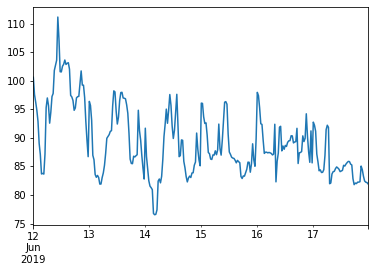

In [6]:
df_WEP['2019-6-12':'2019-6-17']['WEP'].plot()

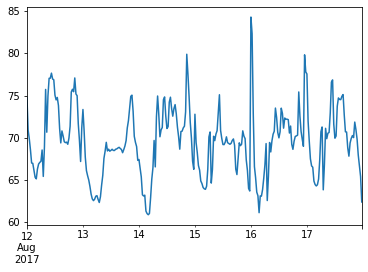

In [9]:
df_WEP['2017-8-12':'2017-8-17']['WEP'].plot()

In [ ]:
def difference(dataset, interval=1):
	diff = list()
	for i in range(interval, len(dataset)):
		value = dataset[i] - dataset[i - interval]
		diff.append(value)
	return diff

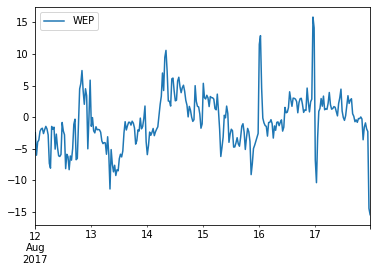

In [13]:
temp=df_WEP.diff(periods=48)
temp['2017-8-12':'2017-8-17'].plot()

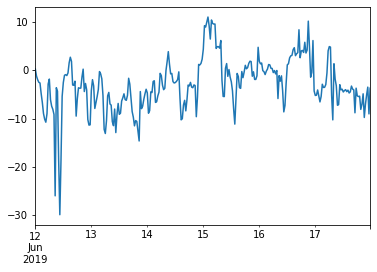

In [14]:
temp['2019-6-12':'2019-6-17']['WEP'].plot()

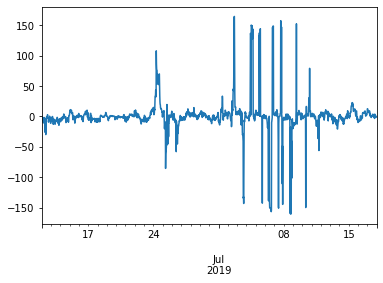

In [16]:
temp['2019-6-12':'2019-7-17']['WEP'].plot()

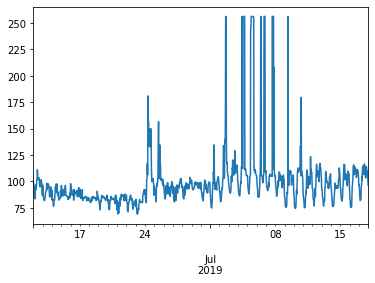

In [17]:
df_WEP['2019-6-12':'2019-7-17']['WEP'].plot()